### (a) Data Processing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data_train.csv")

In [3]:
data.head()

,Unnamed: 0,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,797.0,-200.0,2.1,593.0,146.0,1212.0,72.0,984.0,494.0,10.8,49.7,0.6429
1,1,1282.0,-200.0,11.0,1013.0,354.0,545.0,141.0,1384.0,1287.0,17.4,50.6,0.9989
2,2,891.0,-200.0,7.6,882.0,342.0,885.0,149.0,950.0,894.0,7.8,33.9,0.3594
3,3,1285.0,-200.0,18.1,1243.0,481.0,599.0,173.0,1815.0,1582.0,26.4,41.9,1.4237
4,4,892.0,-200.0,7.3,869.0,71.0,953.0,77.0,1363.0,632.0,37.4,14.7,0.9295


In [4]:
data.shape

(6250, 13)

The data consists of features to access the air quality. Total there are 6250 rows which represents particular data point defined as a set of different features and there are 13 columns of which 11 denotes individual features. The output or the label is PT08.S1(CO) which is the second column. The first column denotes the index of the data. All the features as well as label are of float datatype. Intersetingly for NMHC(GT) feature the values are negative, which does not make sense as concentration can be 0 or above. 

In [5]:
data.isnull()

,Unnamed: 0,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,False,False,False,False,False,False,False,False,False,False,False,False,False
6246,False,False,False,False,False,False,False,False,False,False,False,False,False
6247,False,False,False,False,False,False,False,False,False,False,False,False,False
6248,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Unnamed: 0        0
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64

Data have missing values. data.isnull() gives boolean output with True representing missing value. From isnull.sum() it appears there are total 77 missing values in each features. 

In [7]:
### dropping all the rows with missing data
data.dropna(inplace=True)
data.shape

(6173, 13)

In [8]:
### Extracting features as x_train (numpy array) and label as y_train (numpy array)
x_train = data.iloc[:,2:].values
y_train = data.iloc[:,1].values

x_name = data.columns[2:].values
y_name = data.columns[1]

### (b) Exploratory data analysis

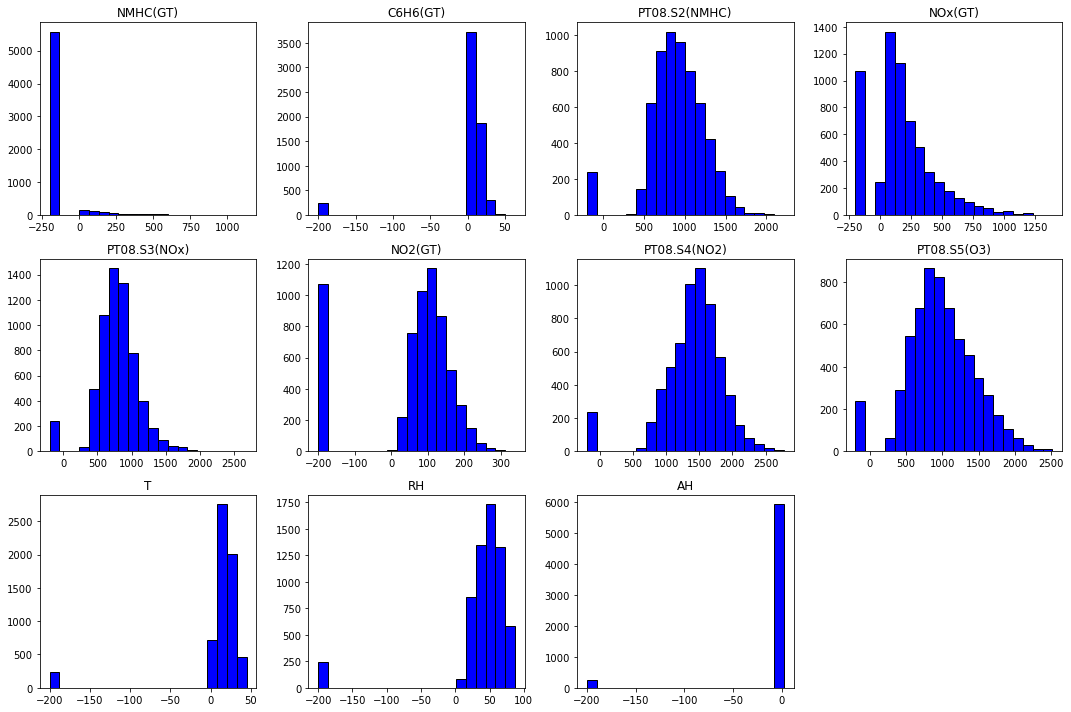

In [9]:
fig , ax = plt.subplots(
    nrows=3,
    ncols=4,
    figsize=(15, 10))

ax = ax.ravel()

for i in range(x_train.shape[1]):
    ax[i].hist(x_train[:,i],bins=20,color='b',edgecolor='k')
    ax[i].set_title(x_name[i])



fig.delaxes(ax[11])
plt.tight_layout()

For a total number of bins of 10 and 15, the histogram looks qualitatively similar. For most of the features, qualitatively the data appears to have a normal distribution. But for some features like PT08.S1(CO) and RH ((has boolean data) the distribution does not appear to be gaussian. There are also outliers for some features like NMHC(GT), C6H6(GT), PT08.S3(NOx), NO2(GT),PT08.S5(O3),T. Moreover all the features appear to have negative values. Other than temperature, all the features should have a non negative value. 

In [10]:
## check for number of times a particular value occurs

for i in range(x_train.shape[1]):
    u, c = np.unique(x_train[:,i], return_counts=True)
    dict1 = dict(zip(u, c))
    a = max(dict1, key=dict1.get)
    print(x_name[i],': Value=',a,', Times repeated=',dict1[a])

NMHC(GT) : Value= -200.0 , Times repeated= 5581
C6H6(GT) : Value= -200.0 , Times repeated= 239
PT08.S2(NMHC) : Value= -200.0 , Times repeated= 239
NOx(GT) : Value= -200.0 , Times repeated= 1068
PT08.S3(NOx) : Value= -200.0 , Times repeated= 239
NO2(GT) : Value= -200.0 , Times repeated= 1070
PT08.S4(NO2) : Value= -200.0 , Times repeated= 239
PT08.S5(O3) : Value= -200.0 , Times repeated= 239
T : Value= -200.0 , Times repeated= 239
RH : Value= -200.0 , Times repeated= 239
AH : Value= -200.0 , Times repeated= 239


Here -200 appears to be an outlier and it appears to repeated a significant number of times. 

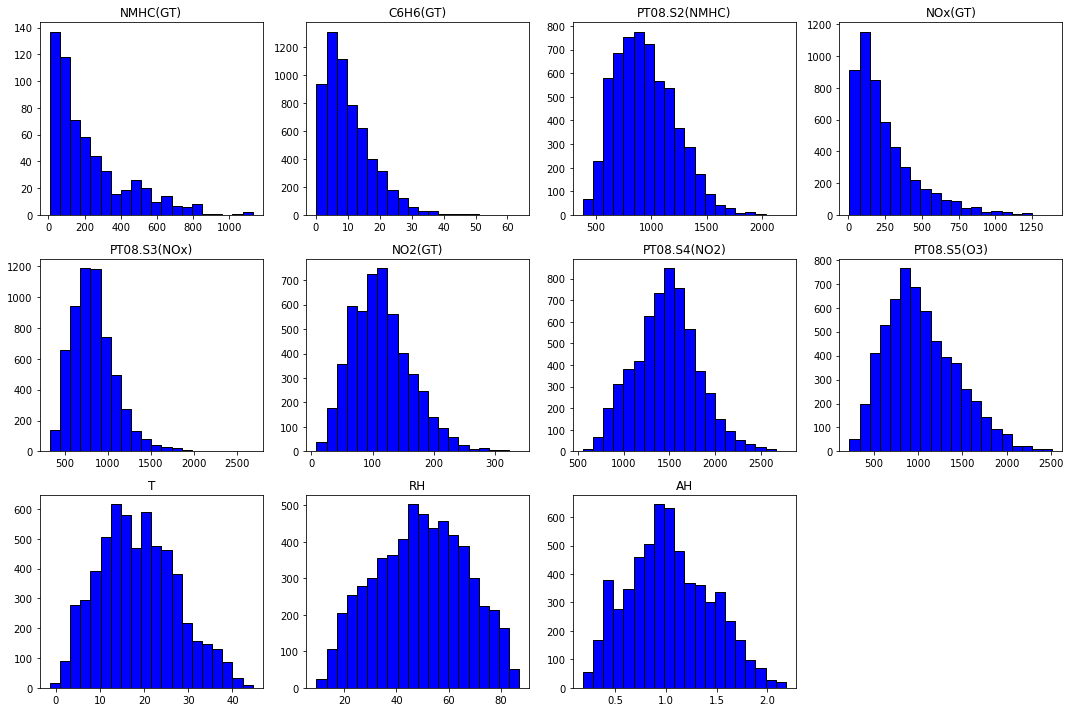

In [11]:
### Removing -200 value from each features

fig , ax = plt.subplots(
    nrows=3,
    ncols=4,
    figsize=(15, 10))

ax = ax.ravel()

for i in range(x_train.shape[1]):
    tmp = x_train[:,i]
    x_mod = tmp[tmp != -200]
    ax[i].hist(x_mod,bins=20,color='b',edgecolor='k')
    ax[i].set_title(x_name[i])


fig.delaxes(ax[11])
plt.tight_layout()

Here the histogram is replotted by discarding all the negative values. Let's consider termperature around -200 as outlier and remove it as well. -200 C is not feasible environment temperature. After removing -200 value, most of the features now appear to have a normal distribution except for NMHC(GT).

Now if we think of removing all the rows with -200 value from the data frame, we will be left with only 9% of the data (can be checked using: data.replace(-200, np.nan), data.dropna()). So we may have to think about replacing -200 to some other value. One of the method for data cleaning for numerical data is by replacing with median values (https://statusneo.com/navigating-outliers-for-accurate-data-analysis-decisions/). 

Moreover since the features have different range, standardization is prefered. This ensures no feature dominates the other features by keeping a similar scale.



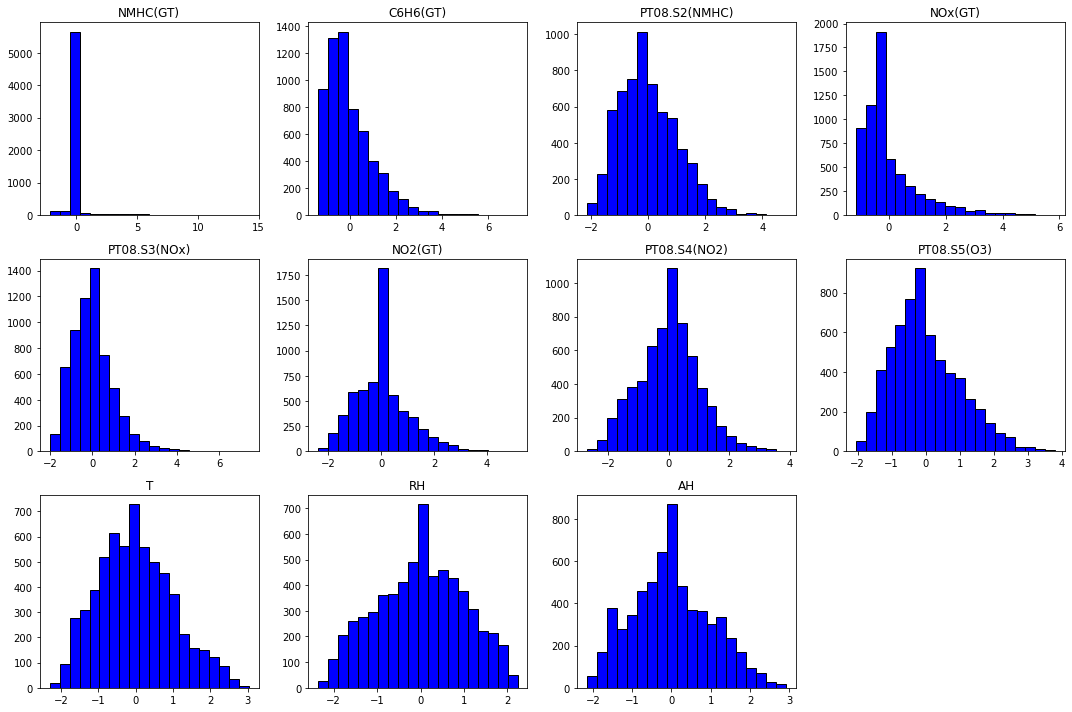

In [12]:
#################
### Replacing -200 

for i in range(len(x_name)):
    x_train[x_train[:,i]==-200,i] = np.median(x_train[x_train[:,i]!=-200,i])
    
#### Standardization 

x_std = np.zeros([len(x_train),len(x_name)])
for i in range(len(x_name)):
    x_std[:,i] = (x_train[:,i]-np.mean(x_train[:,i]))/np.std(x_train[:,i]) 
    
x_train = x_std

fig , ax = plt.subplots(
    nrows=3,
    ncols=4,
    figsize=(15, 10))

ax = ax.ravel()

for i in range(x_train.shape[1]):
    ax[i].hist(x_train[:,i],bins=20,color='b',edgecolor='k')
    ax[i].set_title(x_name[i])



fig.delaxes(ax[11])
plt.tight_layout()

/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


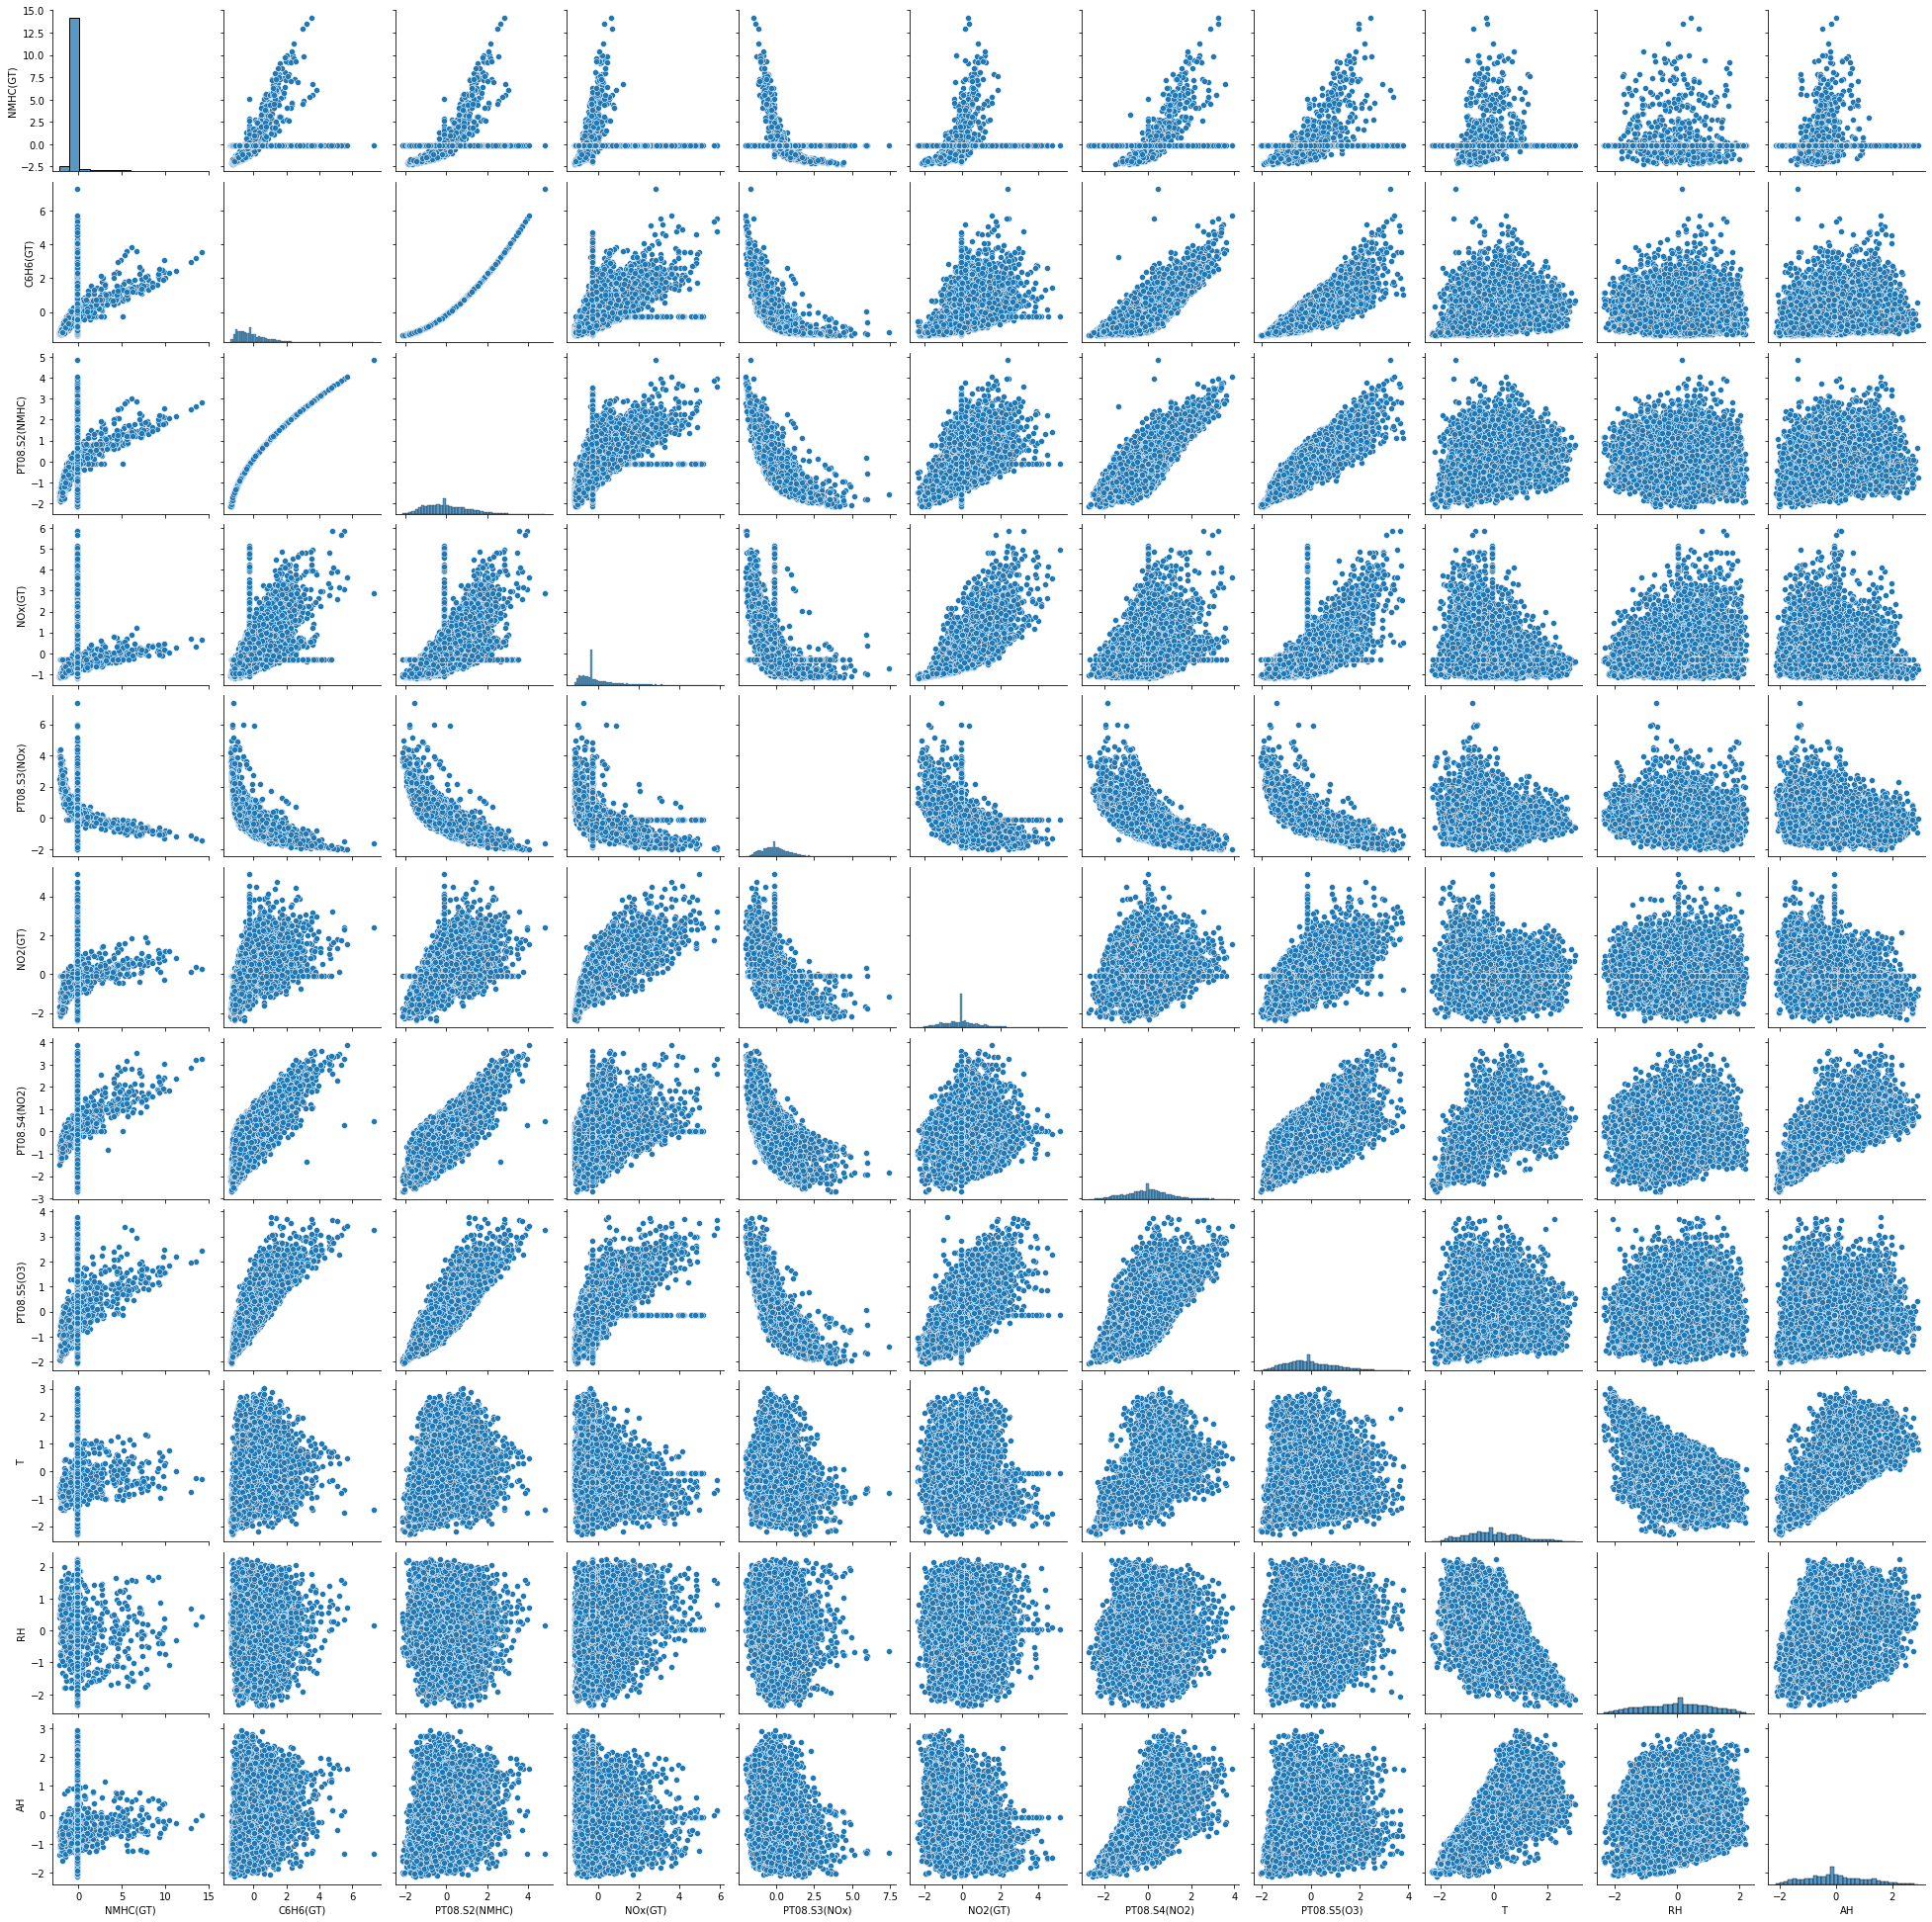

In [13]:
##########
## Pairwise scatter plot

import seaborn as sns

df = pd.DataFrame(x_train, columns=['%s'%i for i in x_name])
sns.pairplot(df)

The above plot shows pairwise correlation for any two features. Here some features shows a positive correlation with other features for e.g. 2nd, 3rd features. Some features also appear to be negatively correlated and some do not show any correlation.

Text(0.5, 1.0, 'PT08.S1(CO)')

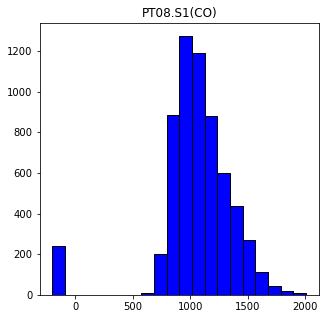

In [14]:
#########################
### Before plotting pearson correlation let's check histogram of label

fig , ax = plt.subplots(
    figsize=(5, 5))

ax.hist(y_train,bins=20,color='b',edgecolor='k')
ax.set_title(y_name)

Here as well there appears outlier of -200 value in label. Since label is concentration and concentration cannot have a negative value, lets replace it with the median value before moving forward.

Text(0.5, 1.0, 'PT08.S1(CO)')

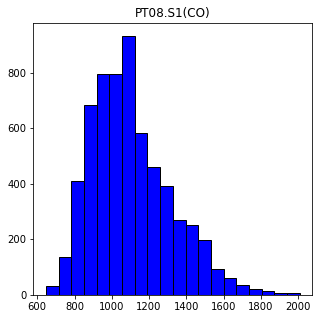

In [15]:
y_train[y_train==-200] = np.median(y_train[y_train!=-200])

### Standardization
# y_std = (y_train-np.mean(y_train))/np.std(y_train) 
# y_train = y_std

fig , ax = plt.subplots(
    figsize=(5, 5))
ax.hist(y_train,bins=20,color='b',edgecolor='k')
ax.set_title(y_name)

<AxesSubplot:>

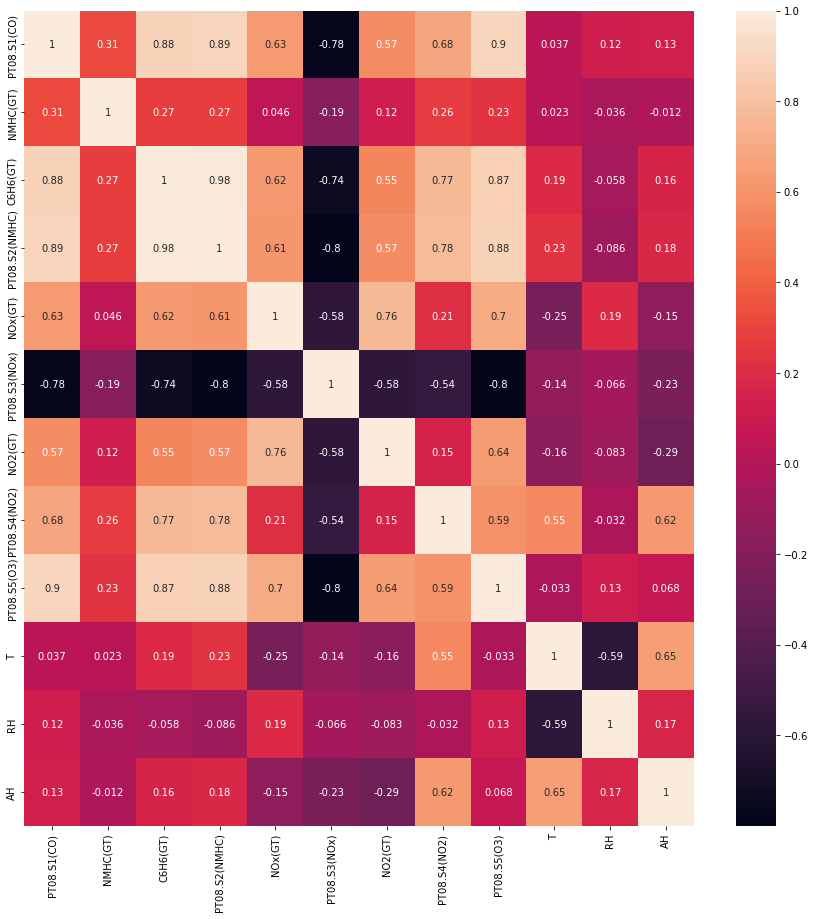

In [16]:
#### Pearson's coefficient

def pearson_coeff(feature1, feature2):
    
    xm = np.mean(feature1)
    ym = np.mean(feature2)
    
    num = np.sum((feature1-xm)*(feature2-ym))
    den = np.sqrt(np.sum((feature1-xm)**2)*np.sum((feature2-ym)**2))
    
    coefficient = num/den
    return coefficient

df_full = np.concatenate([y_train.reshape(-1,1),x_train],axis=1)
name_full = [y_name] + list(x_name)

pearson_l = []
for i in range(df_full.shape[1]):
    for j in range(df_full.shape[1]):
        pearson_l.append(pearson_coeff(df_full[:,i],df_full[:,j]))
        
pearson_l = np.array(pearson_l)
pearson_mat = pearson_l.reshape(12,12)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(pearson_mat, annot= True,xticklabels=name_full,yticklabels=name_full)


Based on the above correlation matrix it appears that the label PT08.S1(CO) is more correlated with features other than NMHC(GT), T, RH, and AH. With others the mod(corr) appears to be greater than 0.5. 
When we look at correlation between features, NMHC (GT) appears to have low correlation (close to 0) with all the features. Moreover T, RH, AH also have low correlation with many features.


### (c) Linear regression implementation

In [18]:
###########################################
## Multiple linear regression

def linear_model(xn,y):
    '''
    Inputs consists of matrix with all the features (x) and an array of label (y).
    The function provide coefficients from the linear regression
    '''
    beta = np.dot(np.dot(np.linalg.inv(np.dot(xn.T,xn)),xn.T),y)
    
    return beta

### Accessing accuracy 
def get_accuracy(xn,y,beta):
    
    (n,p) = xn.shape
    
    y_pred = np.dot(xn,beta)
    
    rss = np.sum((y-y_pred)**2)
    tss = np.sum((y-np.mean(y))**2)
    
    
    rse = np.sqrt(rss/(n-p))
    r2 = 1-(rss/tss)
    
    return rse,r2

#### Define input matrix and compute regression coefficients
(n,p_minus_one) = x_train.shape
p = p_minus_one + 1    
xt = np.ones((n,p))    
xt[:,1:] = x_train

beta = linear_model(xt,y_train)


rse,r2 = get_accuracy(xt,y_train,beta)
print('From training set: RSE = %.5f, R2 = %.5f'%(rse,r2))

print('##### Regression coeff #########')
print('beta0 :',beta[0])
for i in range(len(x_name)):
    print(x_name[i],':',beta[i+1])  

From training set: RSE = 74.42952, R2 = 0.87969
##### Regression coeff #########
beta0 : 1102.1532480155513
NMHC(GT) : 13.454736611172882
C6H6(GT) : 45.845667799141246
PT08.S2(NMHC) : 3.5172714582422984
NOx(GT) : 3.3859017703843186
PT08.S3(NOx) : -30.919298730027265
NO2(GT) : 5.4095471638846355
PT08.S4(NO2) : 56.78880757252573
PT08.S5(O3) : 81.98180347774107
T : 1.2123350344616362
RH : 24.71428773208027
AH : -30.55813482083737


### (d) Logistic regression implementation

In [19]:
#### Logistic regression

def sigmoid_fn(w,x):
    eta = np.dot(x,w)
    return 1/(1+np.exp(-eta))

def gradient_cost_entropy(x,y,w):
    
    sigma = sigmoid_fn(w,x)
    grad_eps = np.mean(((sigma.reshape(-1,1)-y.reshape(-1,1)) * x),axis=0)
    
    return grad_eps

def gradient_descent(x,y,w, lr, n_iter):
    vector = w
    for _ in range(n_iter):
        gradient = gradient_cost_entropy(x,y,vector)
        diff = -lr * gradient
        vector += diff
    return vector

def logistic_reg(x,y):
    
    (n,p_minus_one) = x.shape
    p = p_minus_one + 1  
    xn = np.ones((n,p)) 
    xn[:,1:] = x
    
    w = np.zeros(xn.shape[1])

    vectors = gradient_descent(xn,y,w,lr=0.005,n_iter=1000)
    
    return vectors

def pred_y(x,vectors):
    (n,p_minus_one) = x.shape
    p = p_minus_one + 1  
    xn = np.ones((n,p)) 
    xn[:,1:] = x
    
    sig = sigmoid_fn(vectors,xn)
    y_pred = np.zeros(len(sig))
    
    for i in range(len(sig)):
        if sig[i] > 0.5:
            y_pred[i] = 1
    return y_pred

def compute_accuracy(y_pred,y_test):
    acc = np.sum(y_pred==y_test)/len(y_test)
    return acc

### change the label to binary data
yt = np.zeros(len(y_train))
for i in range(len(y_train)):
    if y_train[i] > 1000:
        yt[i] = 1
        
weights = logistic_reg(x_train,yt)    
y_out = pred_y(x_train,weights)

print('Accuracy of logistic regression model (training):',compute_accuracy(y_out,yt))

print('##### Average weights from logistic regression #########')
print('W0 :',weights[0])
for i in range(len(x_name)):
    print(x_name[i],':',weights[i+1])           
    


Accuracy of logistic regression model (training): 0.8832010367730438
##### Average weights from logistic regression #########
W0 : 0.5289243483163185
NMHC(GT) : 0.03374975744990576
C6H6(GT) : 0.33099663072424657
PT08.S2(NMHC) : 0.43605758532760724
NOx(GT) : 0.18465627532550782
PT08.S3(NOx) : -0.4915694351743554
NO2(GT) : 0.3023684559267729
PT08.S4(NO2) : 0.33517187882228483
PT08.S5(O3) : 0.4450811591371028
T : 0.02099904690005847
RH : 0.08895566950622277
AH : 0.0531346308368145


### (e) Result analysis - Linear regression

In [20]:
## https://medium.com/@avijit.bhattacharjee1996/implementing-k-fold-cross-validation-from-scratch-in-python-ae413b41c80d

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
#     np.random.seed(42)  
    np.random.shuffle(indices)
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 5

# Get the fold indices
fold_indices = kfold_indices(x_train, k)

## list to store RMSE and regression coefficients

rmse_fold = []
beta_fold = []

for i in range(k):
    
    x_train_fold = x_train[fold_indices[i][0]]
    x_val_fold = x_train[fold_indices[i][1]]
    
    y_train_fold = y_train[fold_indices[i][0]]
    y_val_fold = y_train[fold_indices[i][1]]
    
    #### Define input matrix and compute regression coefficients
    (n,p_minus_one) = x_train_fold.shape
    p = p_minus_one + 1    
    xt = np.ones((n,p))    
    xt[:,1:] = x_train_fold

    beta = linear_model(xt,y_train_fold)  ### linear_model defined in (c)
    beta_fold.append(beta)
    
    ### Define input validation matrix
    (n,p_minus_one) = x_val_fold.shape
    p = p_minus_one + 1    
    xv = np.ones((n,p))    
    xv[:,1:] = x_val_fold
    
    ## predict y
    y_pred = np.dot(xv,beta)
    
    rmse = np.sqrt(np.mean((y_val_fold-y_pred)**2))
    rmse_fold.append(rmse)
    
    print('RMSE for validation set',i+1,':',rmse)

rmse_avg = np.mean(rmse_fold)
rmse_std = np.std(rmse_fold)
beta_avg = np.mean(beta_fold,axis=0)

print('')
print('Average RMSE:',rmse_avg)
print('Standard deviation:',rmse_std)
print('')
print('##### Average regression coeff #########')
print('beta0 :',beta_avg[0])
for i in range(len(x_name)):
    print(x_name[i],':',beta_avg[i+1])
    
    

RMSE for validation set 1 : 76.5347751569448
RMSE for validation set 2 : 70.71006370282913
RMSE for validation set 3 : 75.09856097811422
RMSE for validation set 4 : 72.26089270569656
RMSE for validation set 5 : 77.90026452765788

Average RMSE: 74.50091141424852
Standard deviation: 2.6622396023095183

##### Average regression coeff #########
beta0 : 1102.1428550657313
NMHC(GT) : 13.459049637422357
C6H6(GT) : 45.92205090071922
PT08.S2(NMHC) : 3.346393632642858
NOx(GT) : 3.4218106391304226
PT08.S3(NOx) : -30.970405623283206
NO2(GT) : 5.416375529681968
PT08.S4(NO2) : 56.83707116712022
PT08.S5(O3) : 81.9741915003584
T : 1.2249434511412627
RH : 24.705127139776344
AH : -30.57818749403422


The RMSE from different validation set appears comparable and the standard deviation is small. Overall it suggests that the model performance is stable across different folds and is not sensitive to a particular part of data.  

From the coefficeints it appears PT08.S5(O3),PT08.S4(NO2),C6H6(GT), RH have large positive coefficients, that suggests these features may affect strongly to the output. Apart from these, PT08.S3(NOx) and AH show a stong negative value, which suggest these labels may inversely affect label. The coefficient values are also comparable to that obtained in (c). 

From the coefficeints it looks like PT08.S2(NMHC), NOx(GT) and T are close to 0, which suggest they may have less impact on the output. I tried to remove these features and check if the model improves, but the RSE increases and R2 decreases sligtly. This suggests removing any features is not necessary and one can continue using all the features. Below cell has the code to test this.

In [21]:
## Kindly uncomment

# del_ind = []
# for i in range(len(x_name)):
#     if x_name[i] in ['NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)','T']:
#         del_ind.append(i)
        
# x_train_n = np.delete(x_train,del_ind,1) 

# #### Define input matrix and compute regression coefficients
# (n,p_minus_one) = x_train_n.shape
# p = p_minus_one + 1    
# xt = np.ones((n,p))    
# xt[:,1:] = x_train_n

# beta = linear_model(xt,y_train)


# rse,r2 = get_accuracy(xt,y_train,beta)
# print('From training set: RSE = %.5f, R2 = %.5f'%(rse,r2))

### (f) Result analysis - Logistic regression

In [22]:
## compute accuracy, precision, recall, and F1 score

from sklearn.metrics import roc_auc_score

def accuracy_function(y_pred,y_test):
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            TP +=1
        elif y_test[i] == 0 and y_pred[i] == 1:
            FP +=1
        elif y_test[i] == 0 and y_pred[i] == 0:
            TN +=1
        elif y_test[i] == 1 and y_pred[i] == 0:
            FN +=1
            
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = (2*TP)/(2*TP+FP+FN)
    
    return accuracy,precision,recall,F1

#############
## list to store accuracy, precision, recall, and F1 score

results = []
weights_fold = []

for m in range(k):
    
    x_train_fold = x_train[fold_indices[m][0]]
    x_val_fold = x_train[fold_indices[m][1]]
    
    y_train_fold = y_train[fold_indices[m][0]]
    y_val_fold = y_train[fold_indices[m][1]]
    
    #### Define input matrix and compute weights
    (n,p_minus_one) = x_train_fold.shape
    p = p_minus_one + 1    
    xt = np.ones((n,p))    
    xt[:,1:] = x_train_fold
    ### change the label to binary data
    yt = np.zeros(len(y_train_fold))
    for i in range(len(y_train_fold)):
        if y_train_fold[i] > 1000:
            yt[i] = 1  
    weights = logistic_reg(xt,yt)
    weights_fold.append(weights)
    
    ### Define input validation matrix
    (n,p_minus_one) = x_val_fold.shape
    p = p_minus_one + 1    
    xv = np.ones((n,p))    
    xv[:,1:] = x_val_fold
    ### change the label to binary data
    yv = np.zeros(len(y_val_fold))
    for i in range(len(y_val_fold)):
        if y_val_fold[i] > 1000:
            yv[i] = 1
            
    ## predict y
    y_pred = pred_y(xv,weights)
    
    res_fold = accuracy_function(y_pred,yv)
    results.append(res_fold)
    
    auc = roc_auc_score(yv, y_pred)
    print('Accuracy, precision, recall, F1 score and AUC for validation set',m+1,':',res_fold,auc)
                
acc_avg = np.mean(results,axis=0)[0]
acc_std = np.std(results,axis=0)[0]

pre_avg = np.mean(results,axis=0)[1]
pre_std = np.std(results,axis=0)[1]

rec_avg = np.mean(results,axis=0)[2]
rec_std = np.std(results,axis=0)[2]

F1_avg = np.mean(results,axis=0)[3]
F1_std = np.std(results,axis=0)[3]

w_avg = np.mean(weights_fold,axis=0)

print('')
print('Average Accuracy:',acc_avg)
print('Standard deviation:',acc_std)
print('')
print('Average Precision:',pre_avg)
print('Standard deviation:',pre_std)
print('')
print('Average Recall:',rec_avg)
print('Standard deviation:',rec_std)
print('')
print('Average F1 score:',F1_avg)
print('Standard deviation:',F1_std)
print('')
print('##### Average weights from logistic regression #########')
print('W0 :',w_avg[0])
for i in range(len(x_name)):
    print(x_name[i],':',w_avg[i+1])           

Accuracy, precision, recall, F1 score and AUC for validation set 1 : (0.8849270664505673, 0.9377537212449256, 0.8783269961977186, 0.9070680628272252) 0.8874781048404322
Accuracy, precision, recall, F1 score and AUC for validation set 2 : (0.8962722852512156, 0.9340232858990944, 0.9036295369211514, 0.9185750636132316) 0.8931940788054034
Accuracy, precision, recall, F1 score and AUC for validation set 3 : (0.9043760129659644, 0.9412532637075718, 0.9080604534005038, 0.9243589743589744) 0.9028938630638882
Accuracy, precision, recall, F1 score and AUC for validation set 4 : (0.9011345218800648, 0.9315789473684211, 0.910025706940874, 0.9206762028608583) 0.8979953096107878
Accuracy, precision, recall, F1 score and AUC for validation set 5 : (0.8970826580226904, 0.9367741935483871, 0.9029850746268657, 0.9195693476884104) 0.8945157931273863

Average Accuracy: 0.8967585089141006
Standard deviation: 0.006595458654578861

Average Precision: 0.93627668235368
Standard deviation: 0.003296726643817436

Here in logistic regression too there is not a big change in accuracy, precision, recall and F1 score. The standard deviation for all of these appears low.This too suggests that the logistic model performance is stable across different folds and is not sensitive to a particular part of data. 

### (g) ROC Curve - Logistic Regression

AUC for validation set 1 : 0.8979322424915623
AUC for validation set 2 : 0.8932703235366046
AUC for validation set 3 : 0.9028509274101214
AUC for validation set 4 : 0.8938348441798584
AUC for validation set 5 : 0.8947847969455051


Text(0.5, 1.0, 'ROC Curve')

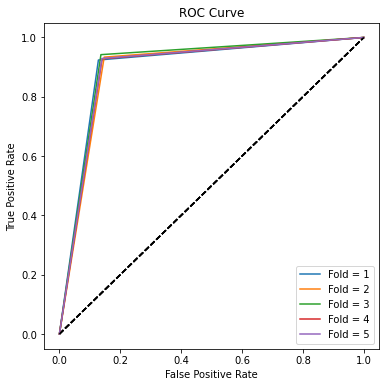

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

results_skl = []

plt.figure(figsize=((6,6)))

for m in range(k):
    
    x_train_fold = x_train[fold_indices[m][0]]
    x_val_fold = x_train[fold_indices[m][1]]
    
    y_train_fold = y_train[fold_indices[m][0]]
    y_val_fold = y_train[fold_indices[m][1]]
    
    ### change the label (train) to binary data
    yt = np.zeros(len(y_train_fold))
    for i in range(len(y_train_fold)):
        if y_train_fold[i] > 1000:
            yt[i] = 1  
     
    ### change the label (validation) to binary data
    yv = np.zeros(len(y_val_fold))
    for i in range(len(y_val_fold)):
        if y_val_fold[i] > 1000:
            yv[i] = 1
            
    log_model = LogisticRegression(random_state=0).fit(x_train_fold, yt)
    
    y_pred = log_model.predict(x_val_fold)
    
    #### ROC curve
    
    fpr, tpr, thresholds = roc_curve(yv, y_pred)
    auc = roc_auc_score(yv, y_pred) 
    print('AUC for validation set %d :'%(m+1), auc)
    
    plt.plot(fpr, tpr, label = 'Fold = %d'%(m+1))
    plt.plot([0, 1], [0, 1], '--', color = 'k')
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')


The AUC from sklearn appears to be comparable with the AUC computed in (f). This suggest it is consistent
with the results we obtained using the logistic regression model.



### (h) Inference - Linear and Logistic Regression

In [25]:
test_data = pd.read_csv("data_test.csv")
test_data.head()

,Unnamed: 0,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,-200.0,8.0,898.0,122.0,933.0,105.0,1594.0,1098.0,17.0,51.7,0.9914
1,1,-200.0,19.4,1281.0,-200.0,774.0,-200.0,1952.0,1324.0,20.8,43.6,1.0614
2,2,-200.0,9.9,975.0,349.0,638.0,223.0,1243.0,1064.0,5.6,74.6,0.6826
3,3,-200.0,12.7,1075.0,103.0,749.0,98.0,1690.0,1022.0,31.7,21.5,0.9902
4,4,-200.0,2.9,647.0,131.0,1054.0,85.0,962.0,828.0,8.4,54.5,0.6022


In [26]:
test_data.isnull().sum()

Unnamed: 0        0
NMHC(GT)         37
C6H6(GT)         37
PT08.S2(NMHC)    37
NOx(GT)          37
PT08.S3(NOx)     37
NO2(GT)          37
PT08.S4(NO2)     37
PT08.S5(O3)      37
T                37
RH               37
AH               37
dtype: int64

In [27]:
### dropping all the rows with missing data
test_data.dropna(inplace=True)
test_data.shape

(3184, 12)

In [28]:
### Extracting features as x_train (numpy array) and label as y_train (numpy array)
x_test = test_data.iloc[:,1:].values

NMHC(GT) : Value= -200.0 , Times repeated= 2862
C6H6(GT) : Value= -200.0 , Times repeated= 127
PT08.S2(NMHC) : Value= -200.0 , Times repeated= 127
NOx(GT) : Value= -200.0 , Times repeated= 571
PT08.S3(NOx) : Value= -200.0 , Times repeated= 127
NO2(GT) : Value= -200.0 , Times repeated= 572
PT08.S4(NO2) : Value= -200.0 , Times repeated= 127
PT08.S5(O3) : Value= -200.0 , Times repeated= 127
T : Value= -200.0 , Times repeated= 127
RH : Value= -200.0 , Times repeated= 127
AH : Value= -200.0 , Times repeated= 127


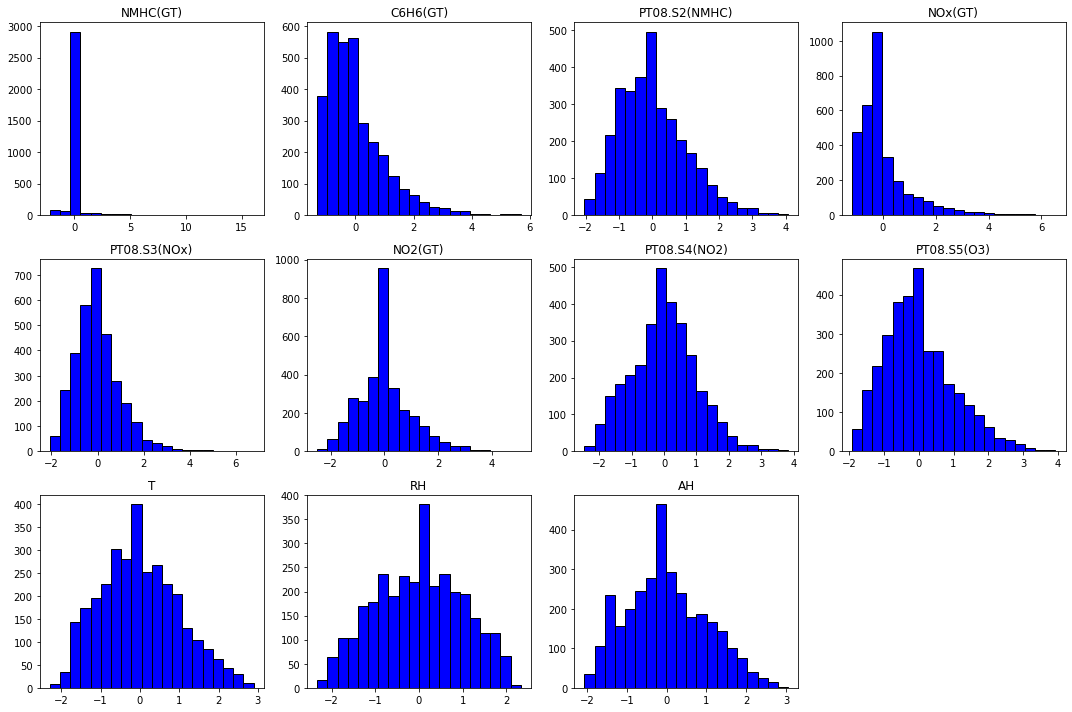

In [29]:
#### Cleaning the data

## check for number of times a particular value occurs

for i in range(x_test.shape[1]):
    u, c = np.unique(x_test[:,i], return_counts=True)
    dict1 = dict(zip(u, c))
    a = max(dict1, key=dict1.get)
    print(x_name[i],': Value=',a,', Times repeated=',dict1[a])
    
#################
### Replacing -200 

for i in range(len(x_name)):
    x_test[x_test[:,i]==-200,i] = np.median(x_test[x_test[:,i]!=-200,i])
    
#### Standardization 

x_std = np.zeros([len(x_test),len(x_name)])
for i in range(len(x_name)):
    x_std[:,i] = (x_test[:,i]-np.mean(x_test[:,i]))/np.std(x_test[:,i]) 
    
x_test = x_std

fig , ax = plt.subplots(
    nrows=3,
    ncols=4,
    figsize=(15, 10))

ax = ax.ravel()

for i in range(x_test.shape[1]):
    ax[i].hist(x_test[:,i],bins=20,color='b',edgecolor='k')
    ax[i].set_title(x_name[i])



fig.delaxes(ax[11])
plt.tight_layout()

In [38]:
###### Predict output from linear regression

'''
Coefficient values from (c) is stored as beta  
'''
(n,p_minus_one) = x_test.shape
p = p_minus_one + 1    
xt = np.ones((n,p))    
xt[:,1:] = x_test

y_linear_pred = np.dot(xt,beta)


###### Predict output from logistic regression


'''
Coefficient values from (d) is stored as weights and pred_y(x,vectors) is function to predict output  
'''

y_log_pred = pred_y(xt,weights)

In [42]:
df = pd.DataFrame({"pred_linear" : y_linear_pred, "pred_logistic" : y_log_pred})
df.to_csv("preds.csv")